# Superstore Sales

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, randint

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Datasets

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Genome06/superstore-sales-dashboard/main/superstore.csv')
df.sample(5)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
36129,Furniture,Chetumal,Mexico,MC-175903,Matt Collister,0.2,LATAM,1,2014-10-22 00:00:00.000,MX-2014-137806,...,417,Corporate,2014-10-26 00:00:00.000,Standard Class,36.373,Quintana Roo,Bookcases,2014,LATAM,43
17466,Office Supplies,Hefei,China,SV-203651,Seth Vernon,0.0,APAC,1,2012-02-02 00:00:00.000,IN-2012-63080,...,773,Consumer,2012-02-08 00:00:00.000,Standard Class,15.540,Anhui,Storage,2012,APAC,5
51134,Technology,Los Angeles,United States,DH-130754,Dave Hallsten,0.2,US,1,2012-02-29 00:00:00.000,CA-2012-102316,...,16,Corporate,2012-03-03 00:00:00.000,Second Class,1.410,California,Phones,2012,North America,9
13619,Office Supplies,Prague,Czech Republic,CH-20702,Cathy Hwang,0.0,EMEA,1,2014-02-28 00:00:00.000,EZ-2014-8460,...,5,Home Office,2014-03-04 00:00:00.000,Standard Class,0.310,Prague,Binders,2014,EMEA,9
45297,Office Supplies,Brisbane,Australia,JS-160301,Joy Smith,0.1,APAC,1,2013-09-25 00:00:00.000,IN-2013-66314,...,176,Consumer,2013-09-29 00:00:00.000,Second Class,14.130,Queensland,Storage,2013,APAC,39


## Check For Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

## Check For Duplicates Data

In [ ]:
df.duplicated().sum()

np.int64(0)

## EDA (Exploratory Data Analysis)

In [ ]:
#Type casting order.date dan ship.date to datetime
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer.ID     51290 non-null  object        
 4   Customer.Name   51290 non-null  object        
 5   Discount        51290 non-null  float64       
 6   Market          51290 non-null  object        
 7   记录数             51290 non-null  int64         
 8   Order.Date      51290 non-null  datetime64[ns]
 9   Order.ID        51290 non-null  object        
 10  Order.Priority  51290 non-null  object        
 11  Product.ID      51290 non-null  object        
 12  Product.Name    51290 non-null  object        
 13  Profit          51290 non-null  float64       
 14  Quantity        51290 non-null  int64         
 15  Re

In [ ]:
#Group the nums and cats feature to each variable
nums =  df.select_dtypes(include=['int64', 'float64', 'datetime64[ns]']).columns
cats =  df.select_dtypes(include=['object', 'category']).columns

### Descriptif Statistic

In [ ]:
#Nums Feature Descriptif Statistic
df[nums].describe()

,Discount,记录数,Order.Date,Profit,Quantity,Row.ID,Sales,Ship.Date,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290,51290.000000,51290.000000,51290.00000,51290.000000,51290,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,2013-05-11 21:26:49.155780864,28.610982,3.476545,25645.50000,246.498440,2013-05-15 20:42:42.745174784,26.375818,2012.777208,31.287112
min,0.000000,1.0,2011-01-01 00:00:00,-6599.978000,1.000000,1.00000,0.000000,2011-01-03 00:00:00,0.002000,2011.000000,1.000000
25%,0.000000,1.0,2012-06-19 00:00:00,0.000000,2.000000,12823.25000,31.000000,2012-06-23 00:00:00,2.610000,2012.000000,20.000000
50%,0.000000,1.0,2013-07-08 00:00:00,9.240000,3.000000,25645.50000,85.000000,2013-07-12 00:00:00,7.790000,2013.000000,33.000000
75%,0.200000,1.0,2014-05-22 00:00:00,36.810000,5.000000,38467.75000,251.000000,2014-05-26 00:00:00,24.450000,2014.000000,44.000000
max,0.850000,1.0,2014-12-31 00:00:00,8399.976000,14.000000,51290.00000,22638.000000,2015-01-07 00:00:00,933.570000,2014.000000,53.000000
std,0.212280,0.0,NaN,174.340972,2.278766,14806.29199,487.567175,NaN,57.296810,1.098931,14.429795


In [ ]:
#Categorical Feature Descriptif Statistic
df[cats].describe()

,Category,City,Country,Customer.ID,Customer.Name,Market,Order.ID,Order.Priority,Product.ID,Product.Name,Region,Segment,Ship.Mode,State,Sub.Category,Market2
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,3,3636,147,4873,795,7,25035,4,10292,3788,13,3,4,1094,17,6
top,Office Supplies,New York City,United States,JG-158051,Muhammed Yedwab,APAC,CA-2014-100111,Medium,OFF-AR-10003651,Staples,Central,Consumer,Standard Class,California,Binders,APAC
freq,31273,915,9994,40,108,11002,14,29433,35,227,11117,26518,30775,2001,6152,11002


### Univariate Analysis

#### Univariate Analysis For Numerical Feature

/tmp/ipython-input-1250996976.py:11: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1250996976.py:11: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1250996976.py:11: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing 

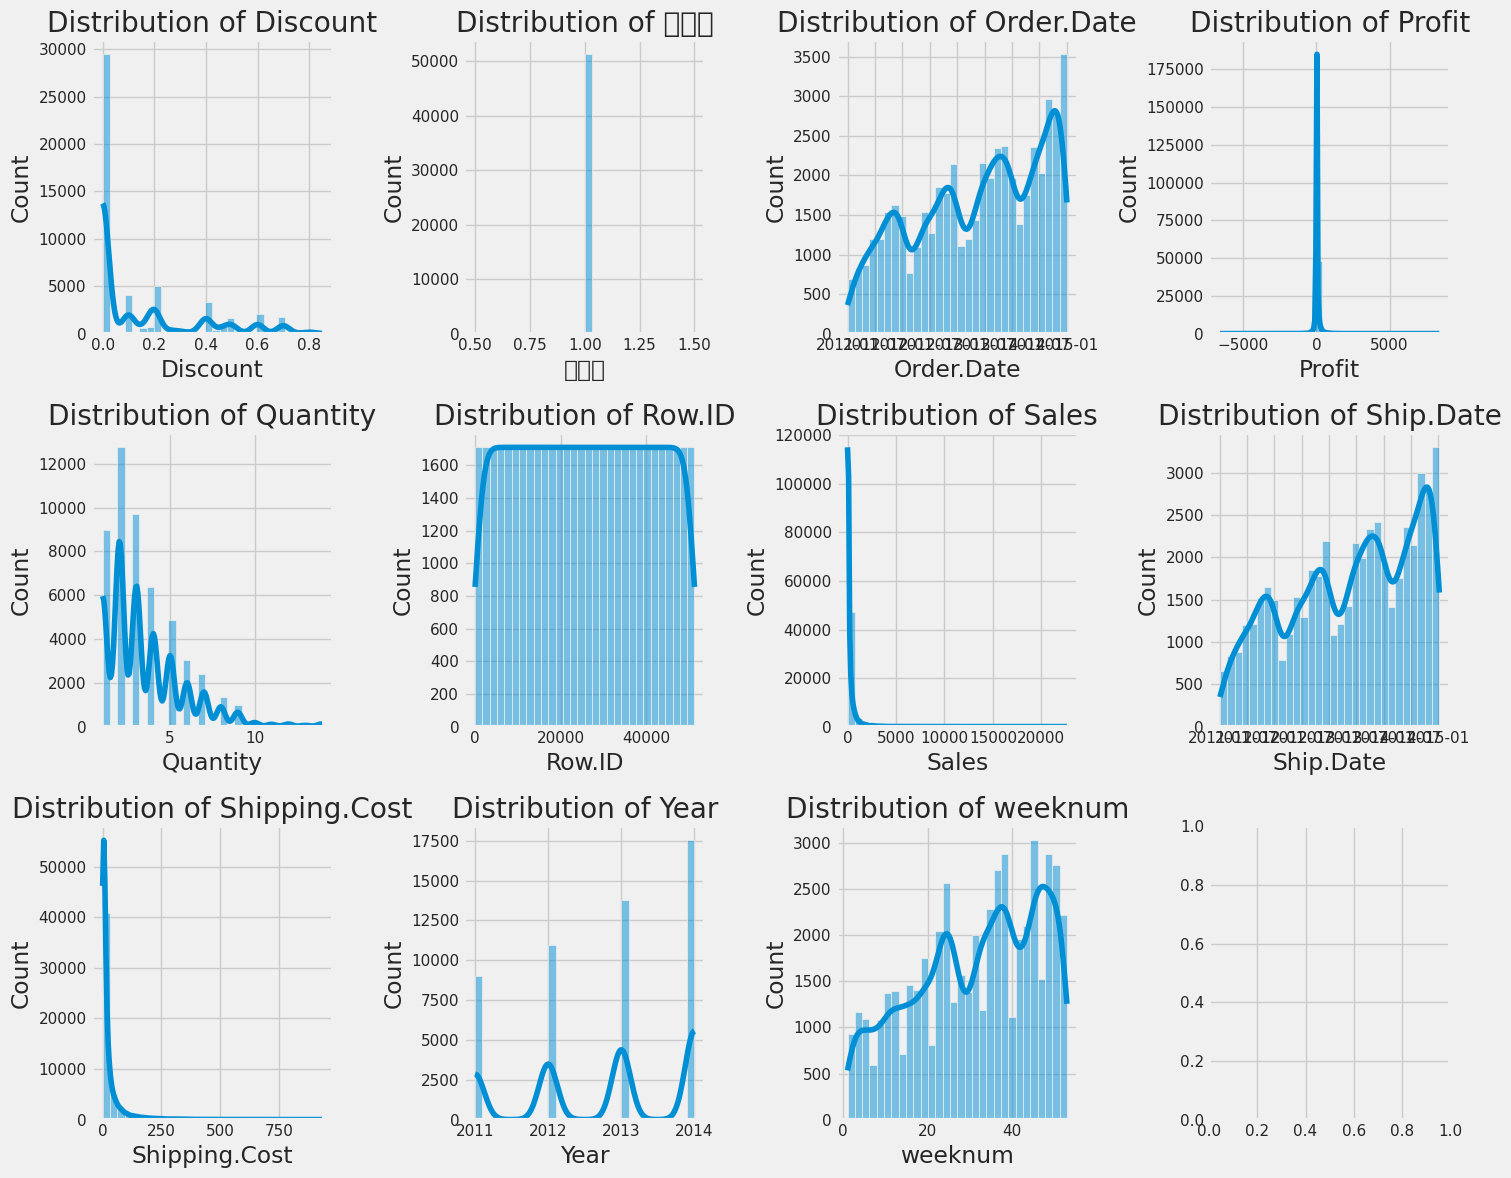

In [ ]:
# Univariate Analysis for Numerical Features
rows = 3
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

for i, col in enumerate(nums):
    r, c = divmod(i, cols)
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[r][c])
    axes[r][c].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

/tmp/ipython-input-4143674075.py:11: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4143674075.py:11: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4143674075.py:11: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing 

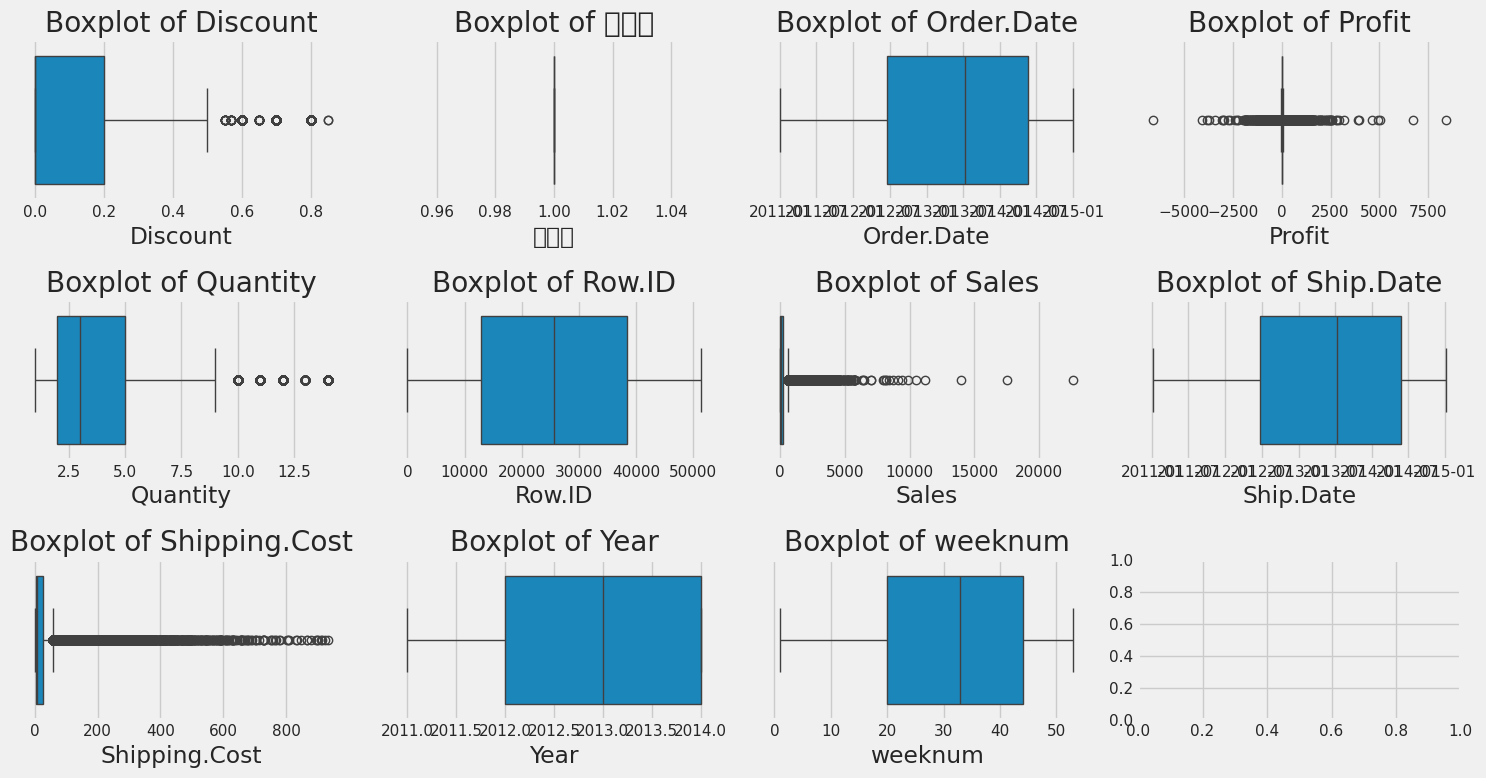

In [ ]:
#Boxplot of numerical features to identify outliers
rows = 3
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))

for i, col in enumerate(nums):
    r, c = divmod(i, cols)
    sns.boxplot(x=df[col].dropna(), ax=axes[r][c])
    axes[r][c].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#### Univariate Analysis For Categorical Feature

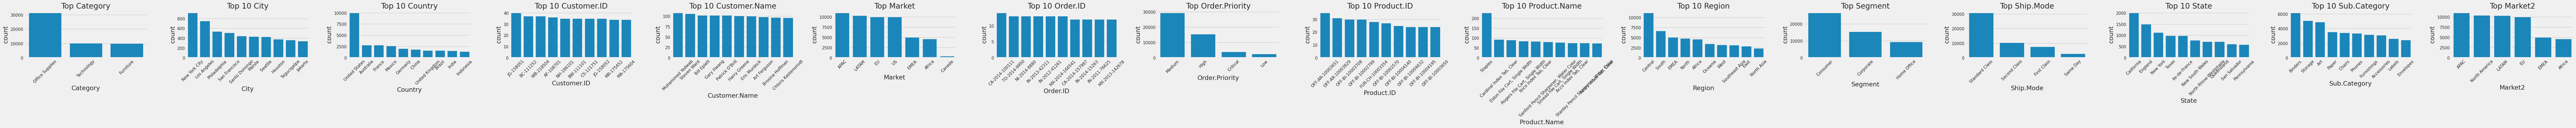

In [ ]:
# Univariate Analysis for Categorical Features (Top 10)
n = len(cats)
fig, axes = plt.subplots(1, n, figsize=(6*n, 5))  # 1 row, and column

not_top = ['Category', 'Market', 'Order.Priority', 'Segment', 'Ship.Mode', 'Market2']

for i, col in enumerate(cats):
    top_10 = df[col].value_counts().head(10).index
    sns.countplot(
        data=df[df[col].isin(top_10)],
        x=col,
        order=top_10,
        ax=axes[i]
    )
    if col in not_top:
        axes[i].set_title(f'Top {col}')
    else:
      axes[i].set_title(f'Top 10 {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Multivariate Analysis

#### Correlation Between Numerical Features

In [ ]:
df[nums].corr()

,Discount,记录数,Order.Date,Profit,Quantity,Row.ID,Sales,Ship.Date,Shipping.Cost,Year,weeknum
Discount,1.000000,NaN,-0.005879,-0.316490,-0.019875,0.087594,-0.086728,-0.005885,-0.079055,-0.005894,-0.000217
记录数,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order.Date,-0.005879,NaN,1.000000,0.002544,0.000199,-0.008079,-0.002327,0.999991,-0.001738,0.969597,0.225560
Profit,-0.316490,NaN,0.002544,1.000000,0.104365,-0.019037,0.484923,0.002551,0.354441,0.002626,-0.000182
Quantity,-0.019875,NaN,0.000199,0.104365,1.000000,-0.173483,0.313580,0.000217,0.272649,-0.005049,0.020839
Row.ID,0.087594,NaN,-0.008079,-0.019037,-0.173483,1.000000,-0.043888,-0.008155,-0.039076,-0.000921,-0.028776
Sales,-0.086728,NaN,-0.002327,0.484923,0.313580,-0.043888,1.000000,-0.002347,0.768075,-0.002902,0.001947
Ship.Date,-0.005885,NaN,0.999991,0.002551,0.000217,-0.008155,-0.002347,1.000000,-0.002336,0.969582,0.225582
Shipping.Cost,-0.079055,NaN,-0.001738,0.354441,0.272649,-0.039076,0.768075,-0.002336,1.000000,-0.003137,0.005347
Year,-0.005894,NaN,0.969597,0.002626,-0.005049,-0.000921,-0.002902,0.969582,-0.003137,1.000000,-0.019627


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:15

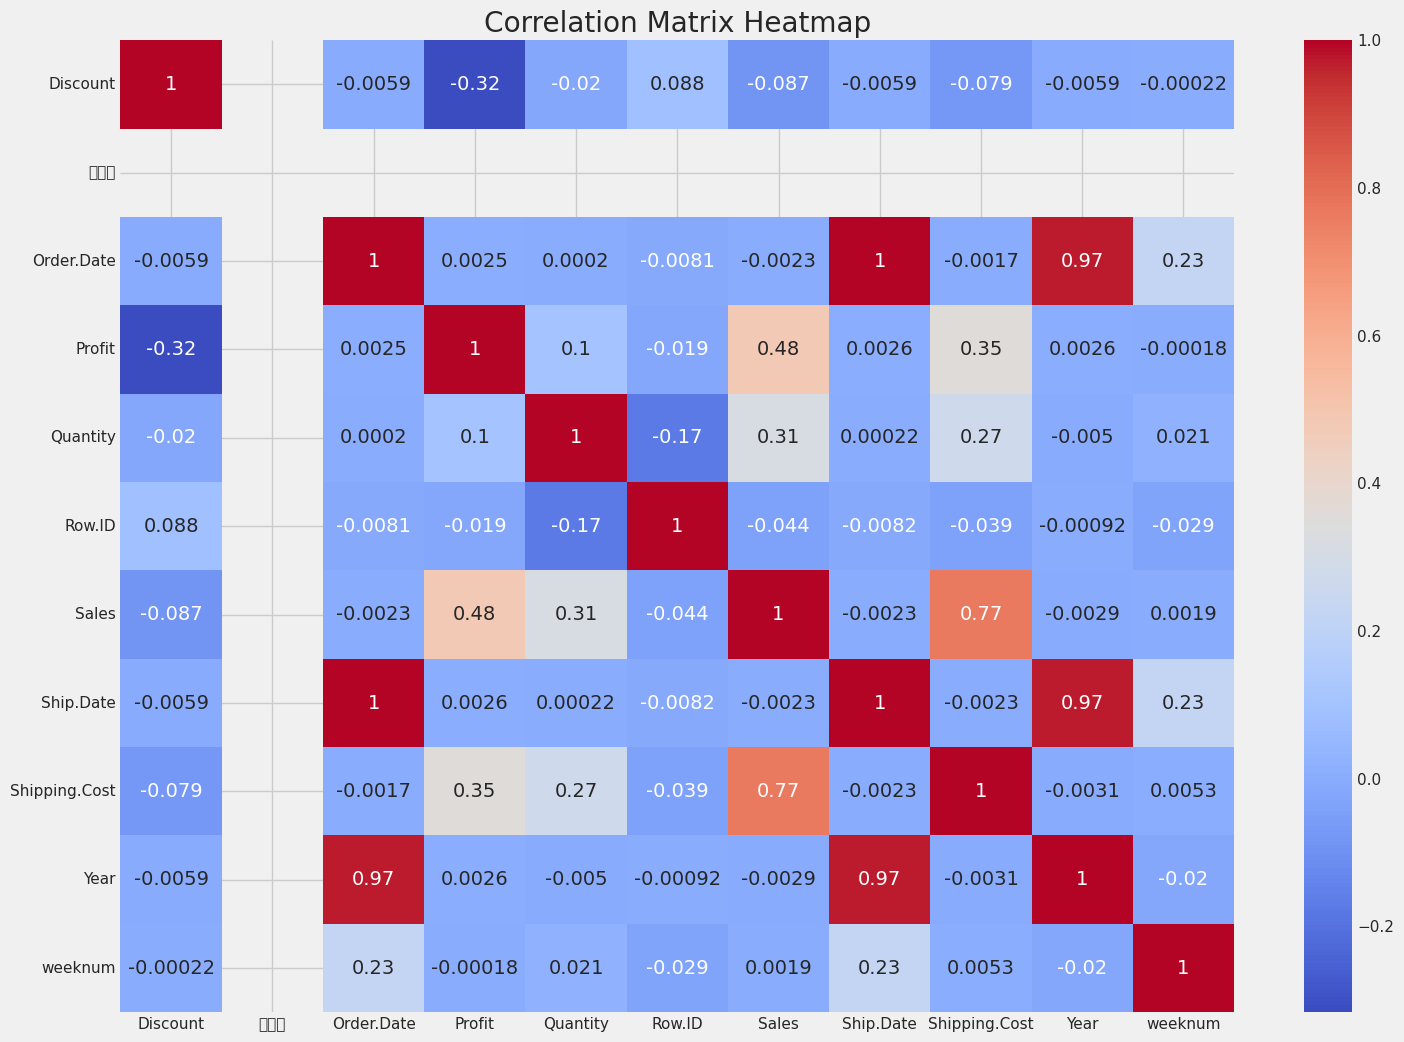

In [ ]:
#Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df[nums].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Corrlation between categorical features

/tmp/ipython-input-3016718610.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_profit.index, y=cat_profit.values, palette='viridis')


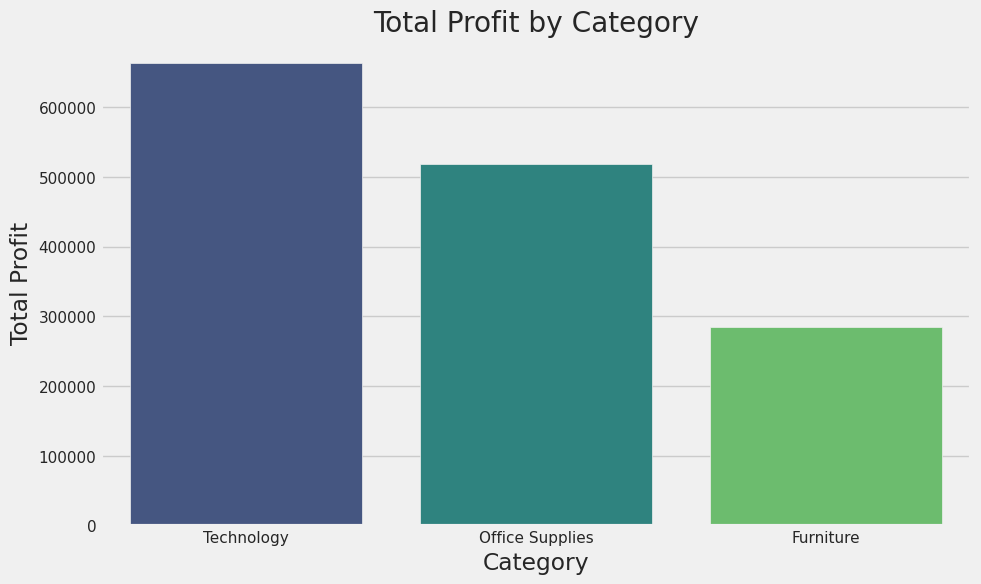

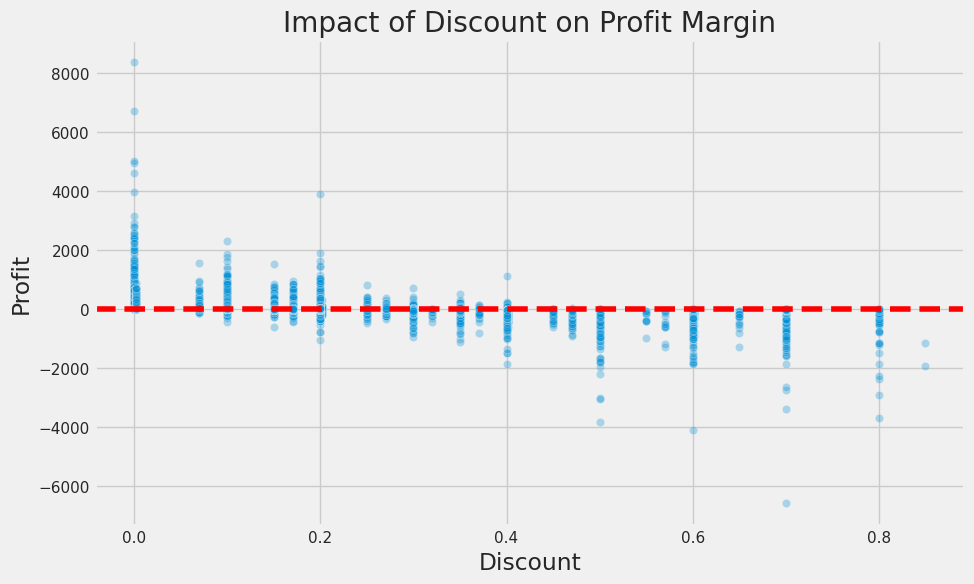

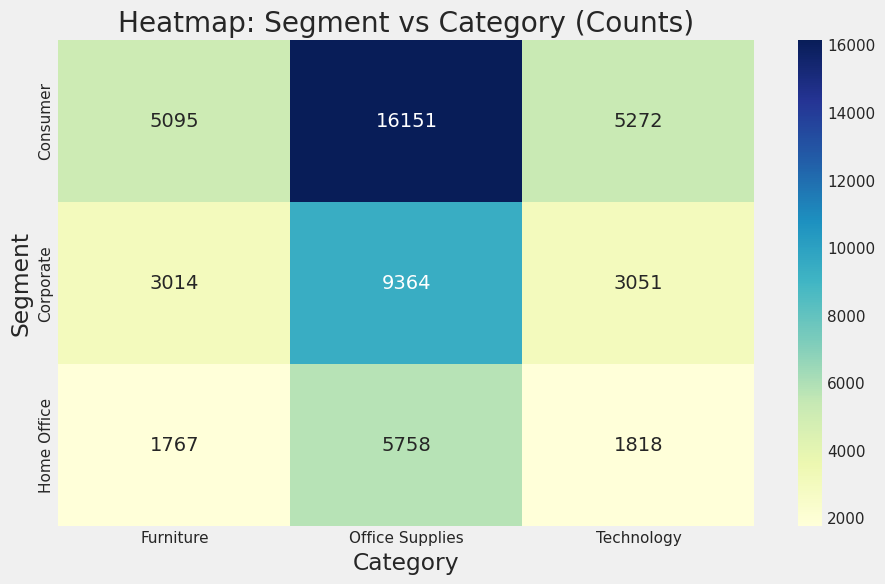

In [ ]:
# Heatmap using Crosstab (Frequencies)
ct_segment_cat = pd.crosstab(df['Segment'], df['Category'])

# Profitability by Category (Bar Chart)
plt.figure(figsize=(10, 6))
cat_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=cat_profit.index, y=cat_profit.values, palette='viridis')
plt.title('Total Profit by Category')
plt.ylabel('Total Profit')
plt.savefig('eda_category_profit.png')

# Relationship between Discount and Profit Margin (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.3)
plt.title('Impact of Discount on Profit Margin')
plt.axhline(0, color='red', linestyle='--') # Baseline profit
plt.savefig('eda_discount_impact.png')

plt.figure(figsize=(10, 6))
sns.heatmap(ct_segment_cat, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Segment vs Category (Counts)')
plt.savefig('heatmap_categorical.png')

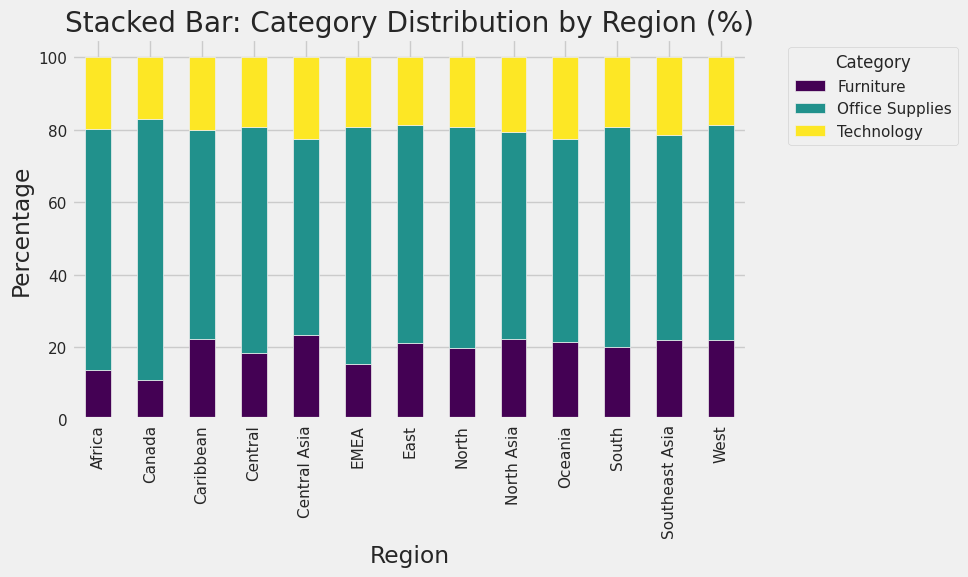

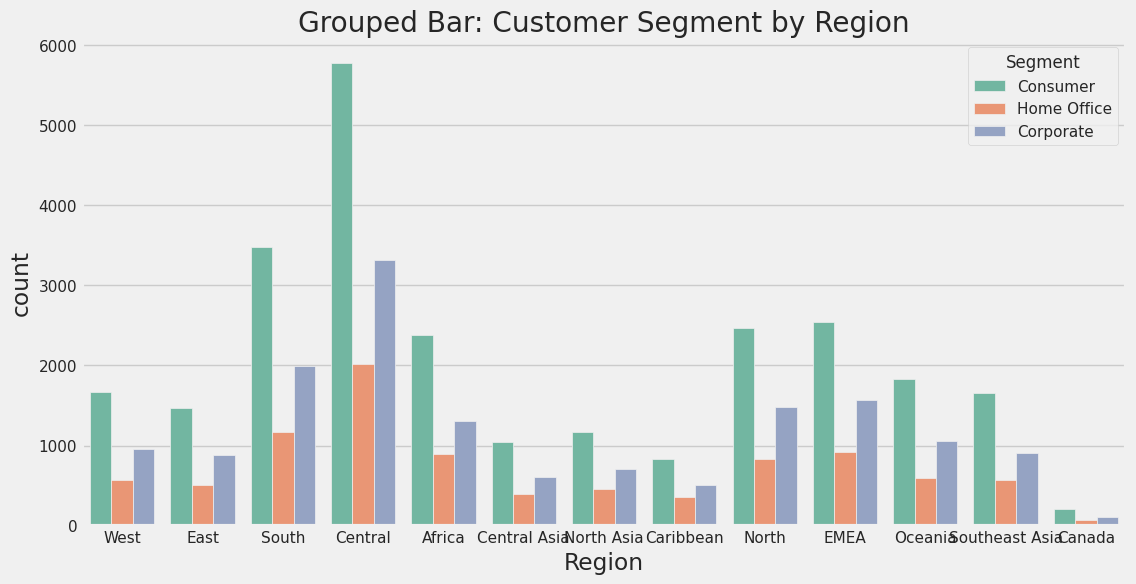

In [ ]:
# Stacked Bar Chart (Normalized to 100% to see distribution)
ct_normalized = pd.crosstab(df['Region'], df['Category'], normalize='index') * 100

ct_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Stacked Bar: Category Distribution by Region (%)')
plt.ylabel('Percentage')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('stacked_bar_categorical.png')

# Grouped Bar Chart (Countplot)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', hue='Segment', palette='Set2')
plt.title('Grouped Bar: Customer Segment by Region')
plt.savefig('grouped_bar_categorical.png')

#### Time series analytics

/tmp/ipython-input-571470096.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('Order.Date').resample('M')[['Sales', 'Profit']].sum()
/tmp/ipython-input-571470096.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_seasonal.index, y=df_seasonal.values, palette='magma')


Summary Statistics for Trends:
               Sales        Profit
count      48.000000     48.000000
mean   263393.854167  30572.026902
std    113887.327322  14414.318700
min     91152.000000   5585.003520
25%    175188.000000  19679.284580
50%    254561.500000  28679.760650
75%    328353.500000  39341.246835
max    555312.000000  67979.451100

Top 3 months with highest sales:
Month.Name
December     1580816
November     1551319
September    1437432
Name: Sales, dtype: int64


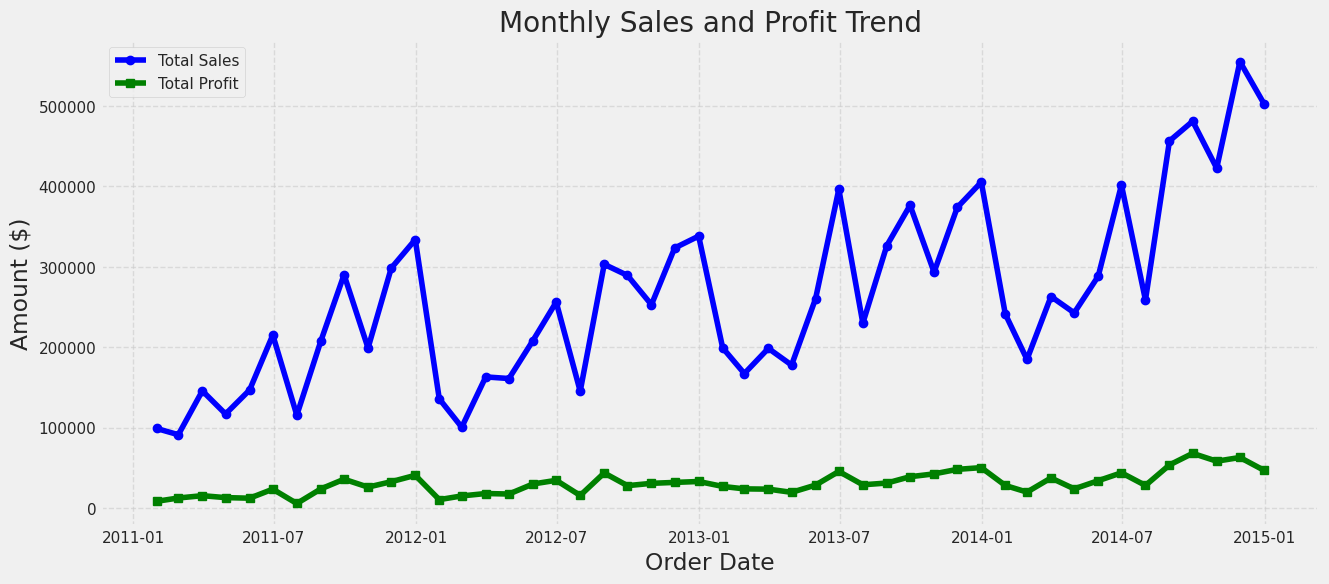

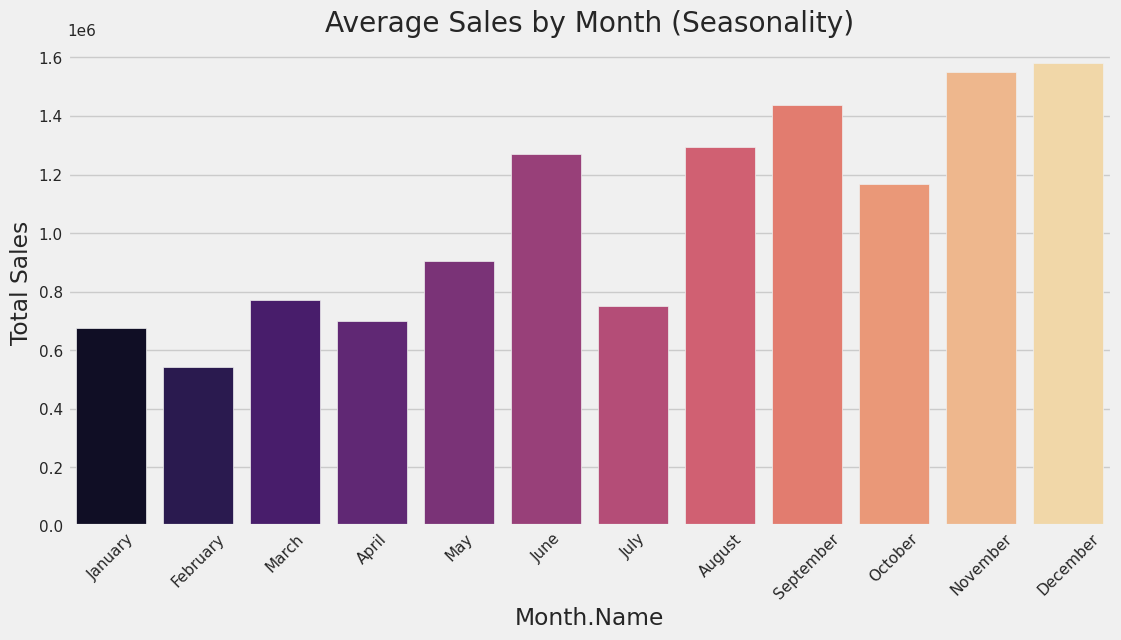

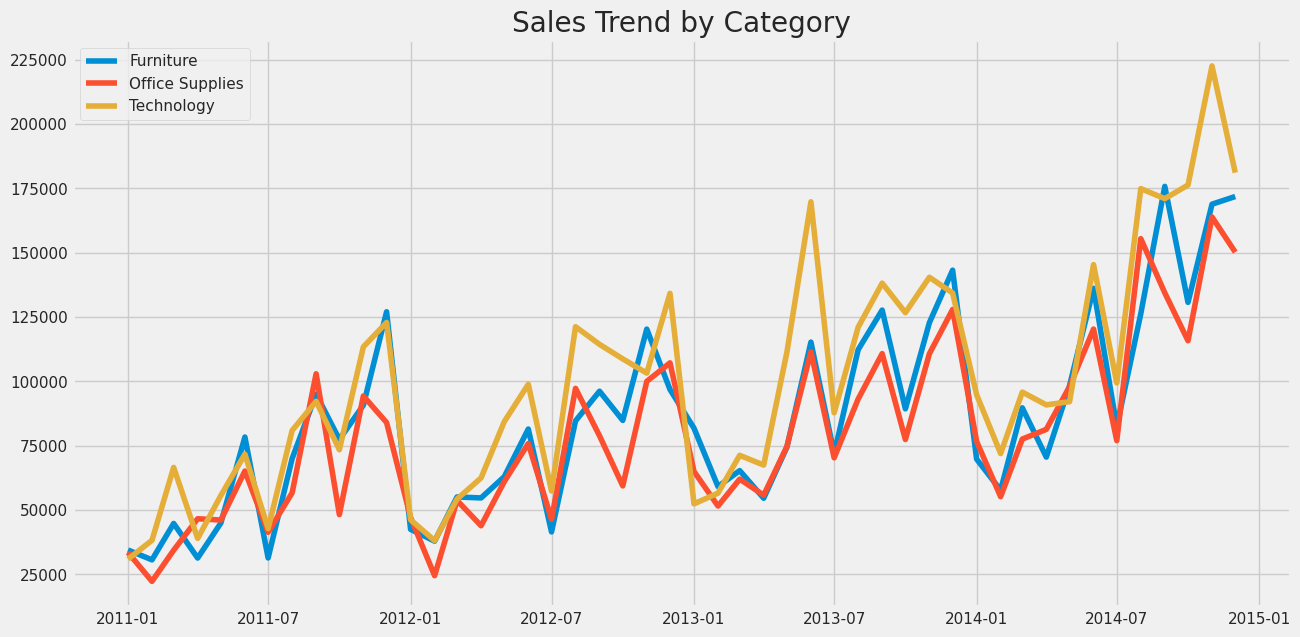

In [ ]:
# Sales and Profit Trend over Time (Monthly Resampling)
df_monthly = df.set_index('Order.Date').resample('M')[['Sales', 'Profit']].sum()

plt.figure(figsize=(14, 6))
plt.plot(df_monthly.index, df_monthly['Sales'], label='Total Sales', marker='o', color='blue')
plt.plot(df_monthly.index, df_monthly['Profit'], label='Total Profit', marker='s', color='green')
plt.title('Monthly Sales and Profit Trend')
plt.xlabel('Order Date')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Seasonality Analysis: Sales by Month (Aggregate across all years)
df['Month.Name'] = df['Order.Date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_seasonal = df.groupby('Month.Name')['Sales'].sum().reindex(month_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_seasonal.index, y=df_seasonal.values, palette='magma')
plt.title('Average Sales by Month (Seasonality)')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')

# Category Trends over Time
df_cat_trend = df.pivot_table(index=df['Order.Date'].dt.to_period('M'),
                             columns='Category',
                             values='Sales',
                             aggfunc='sum')
df_cat_trend.index = df_cat_trend.index.to_timestamp()

plt.figure(figsize=(14, 7))
for cat in df_cat_trend.columns:
    plt.plot(df_cat_trend.index, df_cat_trend[cat], label=cat)
plt.title('Sales Trend by Category')
plt.legend()
plt.savefig('category_time_trend.png')

# Print summary for insight
print("Summary Statistics for Trends:")
print(df_monthly.describe())
print("\nTop 3 months with highest sales:")
print(df_seasonal.sort_values(ascending=False).head(3))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer.ID     51290 non-null  object        
 4   Customer.Name   51290 non-null  object        
 5   Discount        51290 non-null  float64       
 6   Market          51290 non-null  object        
 7   记录数             51290 non-null  int64         
 8   Order.Date      51290 non-null  datetime64[ns]
 9   Order.ID        51290 non-null  object        
 10  Order.Priority  51290 non-null  object        
 11  Product.ID      51290 non-null  object        
 12  Product.Name    51290 non-null  object        
 13  Profit          51290 non-null  float64       
 14  Quantity        51290 non-null  int64         
 15  Re

## Data Cleaning

In [ ]:
# Remove Chinese columns and useless columns
# '记录数' = Record Count, 'row_id' is usually not used for analysis
cols_to_drop = ['记录数', 'row_id']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Standardize column names (replace dots/spaces with underscores)
df.columns = [col.lower().replace('.', '_').replace(' ', '_') for col in df.columns]

# Ensure the date format is correct (Datetime)
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   category        51290 non-null  object        
 1   city            51290 non-null  object        
 2   country         51290 non-null  object        
 3   customer_id     51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   discount        51290 non-null  float64       
 6   market          51290 non-null  object        
 7   order_date      51290 non-null  datetime64[ns]
 8   order_id        51290 non-null  object        
 9   order_priority  51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  product_name    51290 non-null  object        
 12  profit          51290 non-null  float64       
 13  quantity        51290 non-null  int64         
 14  region          51290 non-null  object        
 15  ro

## Feature Engineering

In [ ]:
# 'Cost' Column -> Important for efficiency analysis
# Sales = Cost + Profit, so Cost = Sales - Profit
df['cost'] = df['sales'] - df['profit']

# 'Profit Margin %' column -> A more accurate performance metric than just profit figures
df['profit_margin'] = (df['profit'] / df['sales']) * 100

# 'Shipping Duration' Column -> For logistics analysis (Shipping Efficiency)
df['shipping_duration'] = (df['ship_date'] - df['order_date']).dt.days

# 'Profit Status' Column -> Helps quick visualization (Profit/Loss)
df['is_profitable'] = df['profit'].apply(lambda x: 'Profitable' if x > 0 else 'Loss')

# Additional Time Extraction (Very useful for filters in Tableau)
df['order_year'] = df['order_date'].dt.year
df['order_month_no'] = df['order_date'].dt.month # To sort months (1-12)

In [ ]:
df.sample(5)

,category,city,country,customer_id,customer_name,discount,market,order_date,order_id,order_priority,...,year,market2,weeknum,month_name,cost,profit_margin,shipping_duration,is_profitable,order_year,order_month_no
34641,Office Supplies,Erfurt,Germany,SF-209652,Sylvia Foulston,0.1,EU,2014-10-03,IT-2014-4574180,Medium,...,2014,EU,40,October,17.2360,-7.725000,3,Loss,2014,10
21486,Furniture,Santa Ana,El Salvador,RD-194803,Rick Duston,0.0,LATAM,2013-06-04,MX-2013-133256,Medium,...,2013,LATAM,23,June,231.6000,22.020202,4,Profitable,2013,6
28526,Furniture,New York City,United States,KD-164954,Keith Dawkins,0.0,US,2012-11-08,CA-2012-114811,Medium,...,2012,North America,45,November,7.2720,39.400000,0,Profitable,2012,11
21997,Furniture,Surat,India,KD-163451,Katherine Ducich,0.0,APAC,2014-01-25,IN-2014-46777,Medium,...,2014,APAC,4,January,616.8300,19.996109,4,Profitable,2014,1
837,Office Supplies,Pasadena,United States,BF-110054,Barry Franz,0.0,US,2014-11-22,CA-2014-103380,Medium,...,2014,North America,47,November,5.4822,39.086667,4,Profitable,2014,11


## Save Final Datasets

In [ ]:
#Save Final Datasets
df.to_csv('superstore_final.csv', index=False)